Problem:3

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

mean = 5 
std_dev = 1.5 
# z-score
def calculate_z_score(breaking_strength):
    return (breaking_strength - mean) / std_dev

def proportion_less_than(breaking_strength):
    z_score = calculate_z_score(breaking_strength)
    return stats.norm.cdf(z_score)

def proportion_at_least(breaking_strength):
    z_score = calculate_z_score(breaking_strength)
    return 1 - stats.norm.cdf(z_score)

def proportion_between(lower_value, upper_value):
    z_lower = calculate_z_score(lower_value)
    z_upper = calculate_z_score(upper_value)
    return stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

def proportion_not_between(lower_value, upper_value):
    return 1 - proportion_between(lower_value, upper_value)

proportion_3_17 = proportion_less_than(3.17)

proportion_3_6 = proportion_at_least(3.6)

proportion_5_to_5_5 = proportion_between(5, 5.5)

proportion_not_3_to_7_5 = proportion_not_between(3, 7.5)

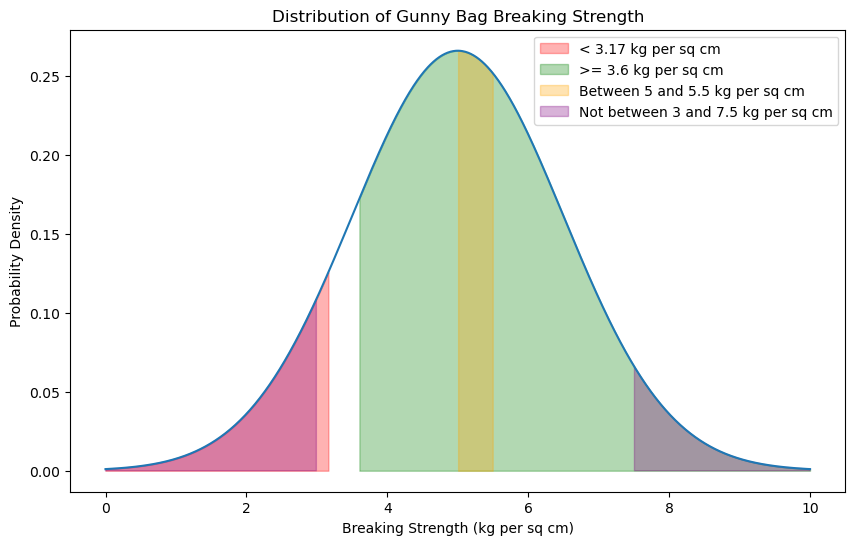

Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: 0.11123243744783456
Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm: 0.8246760551477705
Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm: 0.13055865981823633
Proportion of gunny bags with breaking strength not between 3 and 7.5 kg per sq cm: 0.13900157199868257


In [2]:
x = np.linspace(0, 10, 1000)
y = stats.norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))

plt.plot(x, y)
plt.fill_between(x, y, where=(x < 3.17), alpha=0.3, color='red', label='< 3.17 kg per sq cm')
plt.fill_between(x, y, where=(x >= 3.6), alpha=0.3, color='green', label='>= 3.6 kg per sq cm')
plt.fill_between(x, y, where=((x >= 5)& (x<=5.5)), alpha=0.3, color='orange', label='Between 5 and 5.5 kg per sq cm')
plt.fill_between(x, y, where=((x < 3) | (x > 7.5)), color='purple', alpha=0.3, label='Not between 3 and 7.5 kg per sq cm')

plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability Density')
plt.title('Distribution of Gunny Bag Breaking Strength')
plt.legend()
plt.show()

print(f"Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: {proportion_3_17}")
print(f"Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm: {proportion_3_6}")
print(f"Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm: {proportion_5_to_5_5}")
print(f"Proportion of gunny bags with breaking strength not between 3 and 7.5 kg per sq cm: {proportion_not_3_to_7_5}")


Problem:4

In [3]:
import scipy.stats as stats

mean = 77  
std_dev = 8.5 

def probability_below_grade(grade):
    z_score = (grade - mean) / std_dev
    return stats.norm.cdf(z_score)

def probability_between_grades(lower_value, upper_value):
    z_lower = (lower_value - mean) / std_dev
    z_upper = (upper_value - mean) / std_dev
    return stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

# Function to calculate the grade for a given percentile
def grade_for_percentile(percentile):
    return stats.norm.ppf(percentile) * std_dev + mean

# Question 4.1: Probability that a randomly chosen student gets a grade below 85
probability_below_85 = probability_below_grade(85)

# Question 4.2: Probability that a randomly selected student scores between 65 and 87
probability_between_65_and_87 = probability_between_grades(65, 87)

# Question 4.3: Passing cut-off for 75% of the students to clear the exam
passing_cut_off = grade_for_percentile(0.75)

# Output the results
print(f"Probability that a randomly chosen student gets a grade below 85: {probability_below_85:}")
print(f"Probability that a randomly selected student scores between 65 and 87: {probability_between_65_and_87:}")
print(f"Passing cut-off for 75% of the students to clear the exam: {passing_cut_off:}")


Probability that a randomly chosen student gets a grade below 85: 0.8266927837484748
Probability that a randomly selected student scores between 65 and 87: 0.8012869336779058
Passing cut-off for 75% of the students to clear the exam: 82.7331628766667


Problem:5

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import ttest_1samp

In [5]:
Data=pd.read_csv('Zingaro_Company.csv')

In [6]:
Data

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [7]:
Dataunpolished= Data['Unpolished ']

In [8]:
Dataunpolished

0     164.481713
1     154.307045
2     129.861048
3     159.096184
4     135.256748
         ...    
70    123.067611
71    171.822218
72     88.135994
73    145.150397
74    170.854823
Name: Unpolished , Length: 75, dtype: float64

<Axes: >

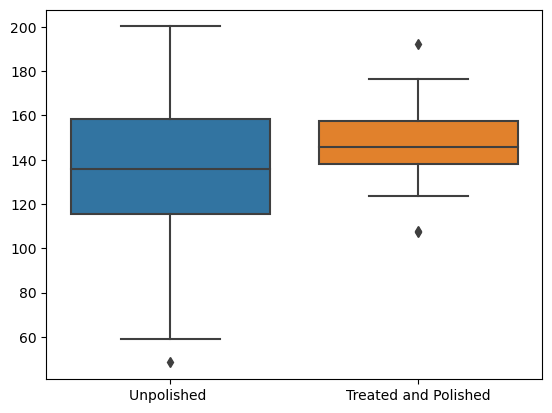

In [9]:
sns.boxplot(Data)

In [10]:
#H0 mean>=150
#H1 mean<150


In [11]:
t_statistic,p_value=stats.ttest_1samp(Dataunpolished,150,alternative='less')

In [12]:
p_value

4.171286997419652e-05

In [13]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean hardness of the unpolished stones is significantly lower than 150.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the mean hardness of the unpolished stones is less than 150.")



Reject the null hypothesis. The mean hardness of the unpolished stones is significantly lower than 150.


In [14]:
Data.mean()

Unpolished              134.110527
Treated and Polished    147.788117
dtype: float64

Problem: 6

In [15]:
Aquarius=pd.read_csv('Aquarius_gym.csv')

In [16]:
Aquarius

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44
...,...,...,...
95,96,16,18
96,97,19,28
97,98,24,28
98,99,14,24


In [17]:
Aquarius['Difference']= Aquarius['After']-Aquarius['Before']

In [18]:
Aquarius

,Sr no.,Before,After,Difference
0,1,39,44,5
1,2,25,25,0
2,3,39,39,0
3,4,6,13,7
4,5,40,44,4
...,...,...,...,...
95,96,16,18,2
96,97,19,28,9
97,98,24,28,4
98,99,14,24,10


In [19]:
difference= Aquarius['Difference']

In [20]:
t_statistic, p_value  =  stats.ttest_rel(Aquarius['Before'],Aquarius['After'])


In [21]:
p_value

2.2920419252511966e-35

In [22]:
t_statistic

-19.322619811082458

In [23]:
alpha = 0.05
   
if p_value < alpha:
       print("Reject the null hypothesis. The program is successful in terms of body conditioning.")
else:
       print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the program is successful in terms of body conditioning.")


Reject the null hypothesis. The program is successful in terms of body conditioning.


Question 7

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_excel('Dental+Hardness+Data.xlsx')  

model_alloy1 = ols('Response ~ C(Dentist)', data=data[data['Alloy'] == 1]).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)

model_alloy2 = ols('Response ~ C(Dentist)', data=data[data['Alloy'] == 2]).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)

print(anova_table_alloy1)
print(anova_table_alloy2)

p_value_alloy1 = anova_table_alloy1['PR(>F)'][0]
p_value_alloy2 = anova_table_alloy2['PR(>F)'][0]

print(f"P-Value for Dentist factor (Alloy 1): {p_value_alloy1}")
print(f"P-Value for Dentist factor (Alloy 2): {p_value_alloy2}")

if p_value_alloy1 < 0.05:
    print("For Alloy 1, there are significant differences in implant hardness among different dentists.")
else:
    print("For Alloy 1, there is no significant difference in implant hardness among different dentists.")

if p_value_alloy2 < 0.05:
    print("For Alloy 2, there are significant differences in implant hardness among different dentists.")
else:
    print("For Alloy 2, there is no significant difference in implant hardness among different dentists.")


                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  1.977112  0.116567
Residual    539593.555556  40.0       NaN       NaN
                  sum_sq    df         F    PR(>F)
C(Dentist)  5.679791e+04   4.0  0.524835  0.718031
Residual    1.082205e+06  40.0       NaN       NaN
P-Value for Dentist factor (Alloy 1): 0.11656712140267639
P-Value for Dentist factor (Alloy 2): 0.7180309510793431
For Alloy 1, there is no significant difference in implant hardness among different dentists.
For Alloy 2, there is no significant difference in implant hardness among different dentists.


In [25]:
model1 = ols('Response ~ C(Method)', data=data[data['Alloy'] == 1]).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

model2 = ols('Response ~ C(Method)', data=data[data['Alloy'] == 2]).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print("One-Way ANOVA Results for Alloy Type 1:")
print(anova_table1)
print("\nOne-Way ANOVA Results for Alloy Type 2:")
print(anova_table2)

p_value_alloy1 = anova_table1['PR(>F)'][0]
p_value_alloy2 = anova_table2['PR(>F)'][0]

print(f"P-Value for Method factor (Alloy 1): {p_value_alloy1}")
print(f"P-Value for Method factor (Alloy 2): {p_value_alloy2}")

if p_value_alloy1 < 0.05:
    print("For Alloy 1, there are significant differences in implant hardness among different methods.")
else:
    print("For Alloy 1, there is no significant difference in implant hardness among different methods.")

if p_value_alloy2 < 0.05:
    print("For Alloy 2, there are significant differences in implant hardness among different methods.")
else:
    print("For Alloy 2, there is no significant difference in implant hardness among different methods.")


One-Way ANOVA Results for Alloy Type 1:
                  sum_sq    df         F    PR(>F)
C(Method)  148472.177778   2.0  6.263327  0.004163
Residual   497805.066667  42.0       NaN       NaN

One-Way ANOVA Results for Alloy Type 2:
             sum_sq    df        F    PR(>F)
C(Method)  499640.4   2.0  16.4108  0.000005
Residual   639362.4  42.0      NaN       NaN
P-Value for Method factor (Alloy 1): 0.004163412167505505
P-Value for Method factor (Alloy 2): 5.415871051443187e-06
For Alloy 1, there are significant differences in implant hardness among different methods.
For Alloy 2, there are significant differences in implant hardness among different methods.


In [26]:
model_alloy1 = ols('Response ~ Temp', data=data[data['Alloy'] == 1]).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)

model_alloy2 = ols('Response ~ Temp', data=data[data['Alloy'] == 2]).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)

print("One-Way ANOVA Results for Alloy Type 1:")
print(anova_table_alloy1)
print("\nOne-Way ANOVA Results for Alloy Type 2:")
print(anova_table_alloy2)

p_value_alloy1 = anova_table_alloy1['PR(>F)'][0]
p_value_alloy2 = anova_table_alloy2['PR(>F)'][0]

print(f"P-Value for Temp factor (Alloy 1): {p_value_alloy1}")
print(f"P-Value for Temp factor (Alloy 2): {p_value_alloy2}")

if p_value_alloy1 < 0.05:
    print("For Alloy 1, there are significant differences in implant hardness among different temperatures.")
else:
    print("For Alloy 1, there is no significant difference in implant hardness among different temperatures.")

if p_value_alloy2 < 0.05:
    print("For Alloy 2, there are significant differences in implant hardness among different temperatures.")
else:
    print("For Alloy 2, there is no significant difference in implant hardness among different temperatures.")


One-Way ANOVA Results for Alloy Type 1:
                 sum_sq    df         F    PR(>F)
Temp       10083.333333   1.0  0.681527  0.413618
Residual  636193.911111  43.0       NaN       NaN

One-Way ANOVA Results for Alloy Type 2:
                sum_sq    df         F    PR(>F)
Temp      8.629603e+04   1.0  3.524941  0.067246
Residual  1.052707e+06  43.0       NaN       NaN
P-Value for Temp factor (Alloy 1): 0.4136182281695441
P-Value for Temp factor (Alloy 2): 0.06724592833336664
For Alloy 1, there is no significant difference in implant hardness among different temperatures.
For Alloy 2, there is no significant difference in implant hardness among different temperatures.


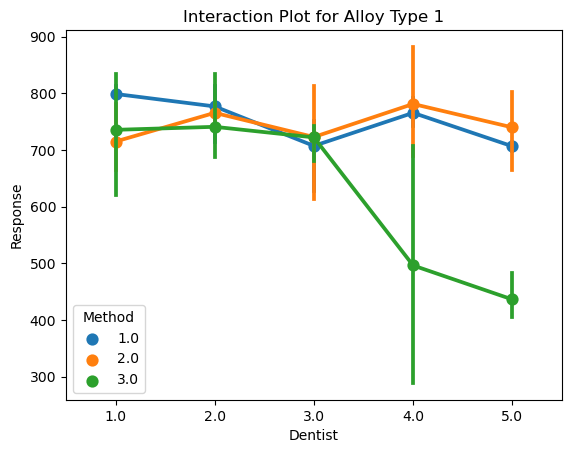

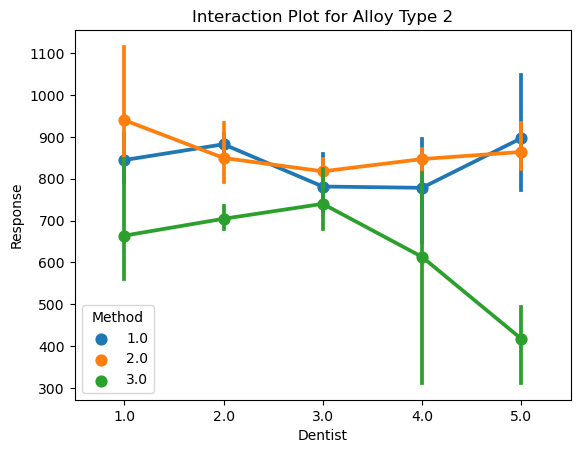

In [27]:
sns.pointplot(x='Dentist', y='Response', hue='Method', data=data[data['Alloy'] == 1])
plt.title('Interaction Plot for Alloy Type 1')
plt.xlabel('Dentist')
plt.ylabel('Response')

plt.show()

# Create interaction plots for Alloy Type 2
sns.pointplot(x='Dentist', y='Response', hue='Method', data=data[data['Alloy'] == 2])
plt.title('Interaction Plot for Alloy Type 2')
plt.xlabel('Dentist')
plt.ylabel('Response')

plt.show()

In [28]:
#To analyze the effect of both factors, dentist and method, separately on each alloy, we can use a two-way ANOVA. This will help determine if there are significant main effects of dentist and method, as well as any interaction effect between the two factors

In [29]:
model1 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=data[data['Alloy'] == 1]).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

model2 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=data[data['Alloy'] == 2]).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

print("Two-Way ANOVA Results for Alloy Type 1:")
print(anova_table1)
print("\nTwo-Way ANOVA Results for Alloy Type 2:")
print(anova_table2)

Two-Way ANOVA Results for Alloy Type 1:
                             sum_sq    df          F    PR(>F)
C(Dentist)            106683.688889   4.0   3.899638  0.011484
C(Method)             148472.177778   2.0  10.854287  0.000284
C(Dentist):C(Method)  185941.377778   8.0   3.398383  0.006793
Residual              205180.000000  30.0        NaN       NaN

Two-Way ANOVA Results for Alloy Type 2:
                             sum_sq    df          F    PR(>F)
C(Dentist)             56797.911111   4.0   1.106152  0.371833
C(Method)             499640.400000   2.0  19.461218  0.000004
C(Dentist):C(Method)  197459.822222   8.0   1.922787  0.093234
Residual              385104.666667  30.0        NaN       NaN


Thank you.